In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

C:\Users\David\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv("SimTodActData.csv")
df = df.drop("Unnamed: 0", 1)
df=df.rename(columns = {'0':'subject', '1':'activity', '2':'raw acc data'})

In [3]:
df.head()

,subject,activity,raw acc data,magnitude,max,min,std,skew,kurtosis,mean,...,z median,x skew,y skew,z skew,x kurtosis,y kurtosis,z kurtosis,x std,y std,z std
0,gia,walking,"[[-9.8000000000000007, 0.29999999999999999, -1...","[9.918669265581952, 9.918669265581952, 9.91866...",14.342245,7.056203,1.153909,0.765104,4.308712,10.103423,...,-1.6,-0.281683,-0.115287,-0.958296,4.834692,4.085765,1.460693,1.204284,1.099321,0.682528
1,gia,walking,"[[-10.9, 0.20000000000000001, -1.2], [-9.90000...","[10.96767979109529, 10.144456614328833, 10.144...",17.623564,5.989157,2.539697,0.793941,0.369980,10.294204,...,-1.9,-1.143094,0.076080,-0.456637,1.420196,1.369993,-0.315002,2.404669,2.229920,1.796619
2,gia,walking,"[[-8.5, -4.4000000000000004, -3.5], [-8.5, -4....","[10.191172650877817, 10.191172650877817, 10.19...",19.783074,7.156815,2.980663,1.883973,3.243430,10.325923,...,-1.9,-1.169397,0.660472,-1.361813,1.634786,0.683003,2.046856,2.649007,2.882193,2.197824
3,gia,walking,"[[-7.2000000000000002, 0.0, -1.2], [-7.2000000...","[7.299315036357863, 7.299315036357863, 7.29931...",20.592474,6.953416,3.096813,1.265939,1.202015,10.695082,...,-2.2,-1.385162,-0.753958,-0.832902,2.479632,1.038908,0.454232,2.830061,2.743193,2.133902
4,gia,walking,"[[-7.2999999999999998, 3.1000000000000001, -2....","[8.179242018671413, 8.275868534480233, 8.27586...",22.588935,7.097183,2.874046,2.321100,6.854679,10.447635,...,-2.0,-1.572159,-0.717104,-0.821070,3.959701,1.671694,0.469151,2.539729,2.612113,1.971313


In [4]:
Y = df['activity']
features = ['max', 'min', 'std', 'skew', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x std', 'y std', 'z std']
X = df[features]
groups = ['subject']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print("Train Set Size: ", len(X_train))
print("Test Set Size: ", len(X_test))

Train Set Size:  808
Test Set Size:  347


[0.85590778097982712, 6]


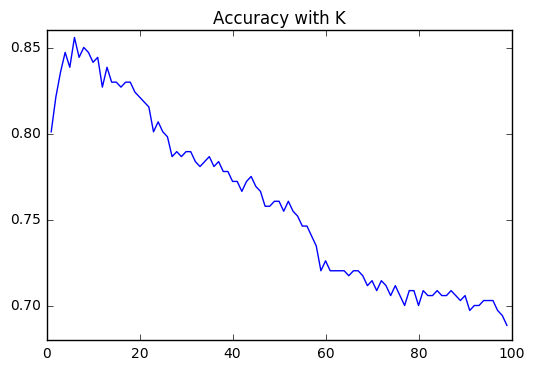

In [6]:
kResult= []
for n in range(1, 100,1):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)

    expected = y_test
    predicted = model.predict(X_test)
    acc = accuracy_score(expected, predicted)


    kResult.append([acc,n])
print(max(kResult))
#plotting peak k value preformance 
kResult = pd.DataFrame(kResult, columns=["n", "acc"])
plt.plot(kResult.acc, kResult.n)
plt.title("Accuracy with K")
plt.show()

In [7]:
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [8]:
expected = y_test
predicted = model.predict(X_test)

Confusion matrix


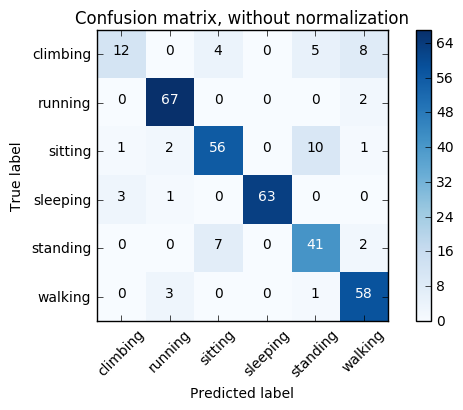

In [9]:
class_names = ["climbing", "running", "sitting", "sleeping", "standing", "walking"]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(expected, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

[0.87896253602305474, 96]


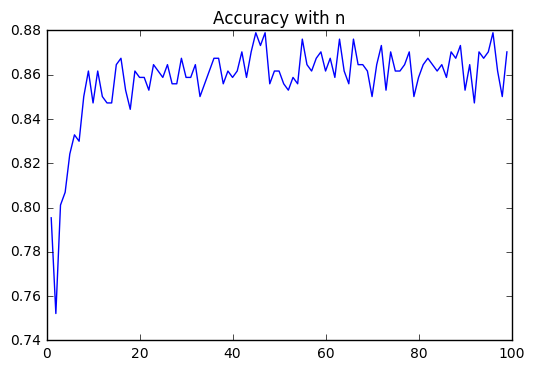

In [41]:
nResult= []
for n in range(1, 100,1):
    model = RandomForestClassifier(n_estimators = n)
    model.fit(X_train, y_train)

    expected = y_test
    predicted = model.predict(X_test)
    acc = accuracy_score(expected, predicted)


    nResult.append([acc,n])
print(max(nResult))
#plotting peak k value preformance 
nResult = pd.DataFrame(nResult, columns=["n", "acc"])
plt.plot(nResult.acc, nResult.n)
plt.title("Accuracy with n")
plt.show()

In [42]:
model = RandomForestClassifier(n_estimators = 96)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=96, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [43]:
expected = y_test
predicted = model.predict(X_test)

In [44]:
print("Classification Report:")
print(metrics.classification_report(expected, predicted))

Classification Report:
             precision    recall  f1-score   support

   climbing       0.74      0.59      0.65        29
    running       0.94      0.93      0.93        69
    sitting       0.83      0.79      0.81        70
   sleeping       0.97      0.96      0.96        67
   standing       0.77      0.86      0.81        50
    walking       0.85      0.94      0.89        62

avg / total       0.87      0.87      0.87       347



Confusion matrix


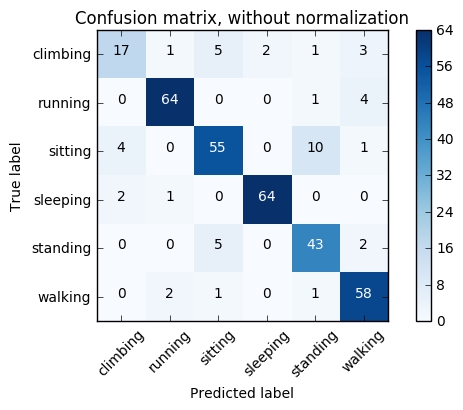

In [45]:
class_names = ["climbing", "running", "sitting", "sleeping", "standing", "walking"]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(expected, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()